In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot

In [2]:
x = pd.read_csv('vol/intermediate_result/X_opening.csv')
y = x['worldwide_gross']
x = x.drop('worldwide_gross',axis=1)

In [3]:
len(x)

2221

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1)

In [5]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x,y,random_state=1)

In [6]:
pd.DataFrame.equals(x_train,x2_train)

True

In [7]:
x_train.head()

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
1724,20000000.0,2004.0,1.85,99.0,1189.0,40000000.0,4.8,6160886.0,2445.0
2027,14000000.0,1998.0,2.35,99.0,3500.0,14000000.0,5.5,10515444.0,2257.0
1843,18000000.0,2008.0,2.35,98.0,2215.0,18000000.0,5.1,300000.0,482.0
470,72000000.0,2001.0,2.35,116.0,14780.0,72000000.0,4.5,12174504.0,2905.0
1225,31000000.0,2012.0,2.35,138.0,20952.0,31000000.0,7.3,24900566.0,1884.0


In [8]:
x_train.head()


,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
1724,20000000.0,2004.0,1.85,99.0,1189.0,40000000.0,4.8,6160886.0,2445.0
2027,14000000.0,1998.0,2.35,99.0,3500.0,14000000.0,5.5,10515444.0,2257.0
1843,18000000.0,2008.0,2.35,98.0,2215.0,18000000.0,5.1,300000.0,482.0
470,72000000.0,2001.0,2.35,116.0,14780.0,72000000.0,4.5,12174504.0,2905.0
1225,31000000.0,2012.0,2.35,138.0,20952.0,31000000.0,7.3,24900566.0,1884.0


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

scores = cross_val_score(Lasso(),x,y,cv=5,scoring='r2')
scores

array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894])

In [10]:
scores.mean()

0.44964021745791766

In [11]:
Lasso().fit(x_train,y_train).score(x_test,y_test)

0.7926190294963363

In [12]:
!pip install --upgrade scikit-learn

You should consider upgrading via the 'python -m pip install --upgrade pip' command.
Requirement already up-to-date: scikit-learn in c:\users\daromero\appdata\local\programs\python\python38-32\lib\site-packages (0.22.2.post1)


In [15]:
from sklearn.model_selection import cross_validate

results = cross_validate(Lasso(),x,y,return_train_score=True,cv=5)
results

{'fit_time': array([0.09740448, 0.09814548, 0.09798646, 0.08795857, 0.0959866 ]),
 'score_time': array([0.00199652, 0.00201964, 0.00104523, 0.0010004 , 0.00200367]),
 'test_score': array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894]),
 'train_score': array([0.68988012, 0.77004932, 0.76604995, 0.76123379, 0.75837599])}

In [16]:
test_scores = results['test_score']
train_scores =  results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))


0.7491178363039036
0.44964021745791777


In [17]:
from sklearn.neighbors import KNeighborsRegressor

cross_validate(KNeighborsRegressor(), x,y,cv=5)

{'fit_time': array([0.01502919, 0.01200891, 0.00795293, 0.00599742, 0.00604439]),
 'score_time': array([0.01001477, 0.00597358, 0.00399852, 0.00600052, 0.00396991]),
 'test_score': array([0.3647382 , 0.59274527, 0.21545625, 0.15143495, 0.25635077])}

In [18]:
cross_validate(KNeighborsRegressor(n_neighbors=10), x,y,cv=5)


{'fit_time': array([0.0109992 , 0.00899792, 0.00495338, 0.00500774, 0.00699973]),
 'score_time': array([0.01199031, 0.00710773, 0.00703311, 0.00598788, 0.00504613]),
 'test_score': array([0.23553954, 0.61921355, 0.24881301, 0.1209604 , 0.2466995 ])}

In [19]:
n = np.arange(2,50,2)
n

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48])

In [20]:
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(KNeighborsRegressor(),x,y,param_name='n_neighbors',param_range=n,cv=5)


In [24]:
np.mean(train_scores,axis=1)

array([0.86831591, 0.79120817, 0.7593398 , 0.7498298 , 0.74238245,
       0.73284018, 0.72586058, 0.71779833, 0.71281982, 0.70976325,
       0.70723469, 0.70502429, 0.70174649, 0.69741543, 0.69379214,
       0.69163113, 0.68955146, 0.6862285 , 0.68321376, 0.68018032,
       0.67885534, 0.67522056, 0.67135123, 0.66953759])

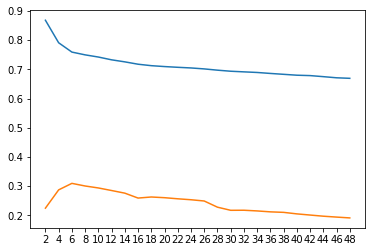

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(np.mean(train_scores,axis=1))
plt.plot(np.mean(test_scores,axis=1))
plt.xticks(np.arange(24),n);


In [32]:
from sklearn.model_selection import learning_curve

lc = learning_curve(KNeighborsRegressor(n_neighbors=6),x,y,cv=5)
samples, train, test = lc[0], lc[1], lc[2]

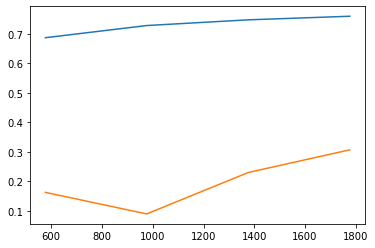

In [36]:
plt.plot(samples[1:],np.mean(train, axis=1)[1:])
plt.plot(samples[1:],np.mean(test, axis=1)[1:])